In [14]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
os.getcwd()

'C:\\Users\\jmp08\\Desktop\\Data\\Competition\\Astro\\Astro'

In [56]:
eda = pd.read_csv("./RawData/train.csv")

In [57]:
eda.shape

(320000, 20)

In [64]:
eda = eda[(eda.loc[:, ["u", "g", "r", "i", "z", "dered_u", "dered_g", "dered_r", "dered_i", "dered_z"]] > 0).all(axis = 1)]

In [65]:
eda.describe()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000
mean,159998.571299,19.852754,18.431958,17.735787,17.304289,17.061306,0.058309,19.630062,18.259255,17.616115,17.215431,16.994731,6.332845,6.139013,1.175762,1.176527,1.175130,1.175429,1.176127,1.116345
std,92376.937684,1.942788,1.659078,1.466163,1.319846,1.333289,0.575477,1.907178,1.656551,1.466500,1.324871,1.323293,8.881383,8.551871,0.116299,0.118067,0.114725,0.115487,0.117157,0.923455
min,0.000000,2.265091,1.238303,7.731354,2.749176,5.128114,-166.048260,0.753796,3.082781,6.040316,6.856107,7.256706,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027,0.000000
25%,79998.250000,18.724221,17.474867,16.877207,16.523933,16.288998,0.000036,18.563722,17.348440,16.787267,16.453140,16.234172,1.000000,1.000000,1.088218,1.088448,1.087761,1.088018,1.088294,0.000000
50%,159998.500000,19.419461,18.140524,17.525847,17.149758,16.917696,0.047133,19.264650,18.022440,17.443435,17.087390,16.869410,2.000000,2.000000,1.179349,1.179234,1.179374,1.179377,1.179301,1.000000
75%,239998.750000,20.432049,19.072905,18.428079,18.007461,17.728957,0.094600,20.197633,18.888468,18.291160,17.906970,17.655643,5.000000,5.000000,1.227534,1.225979,1.229233,1.228595,1.226751,2.000000
max,319999.000000,58.623328,46.338272,72.009662,50.164052,52.612664,62.323343,30.777850,30.613170,31.957200,32.016220,30.781270,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390,2.000000


In [66]:
eda["class"].value_counts()

2    157213
0    119985
1     42780
Name: class, dtype: int64

In [67]:
target = eda["class"]
eda.drop(["id", "class"], axis = "columns", inplace = True)
scaler = MinMaxScaler()
eda = pd.DataFrame(scaler.fit_transform(eda), columns = eda.columns)
eda["class"] = target

In [68]:
eda.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319978.000000,319956.000000
mean,0.312069,0.381234,0.155642,0.306974,0.251307,0.727352,0.628705,0.551263,0.446651,0.411736,0.413951,0.124020,0.125342,0.167222,0.163398,0.171210,0.169195,0.165296,1.116335
std,0.034472,0.036787,0.022810,0.027836,0.028078,0.002520,0.063522,0.060172,0.056585,0.052658,0.056252,0.206544,0.208582,0.110685,0.109293,0.112258,0.111449,0.109969,0.923455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.292045,0.360013,0.142285,0.290516,0.235042,0.727097,0.593189,0.518179,0.414670,0.381438,0.381621,0.000000,0.000000,0.083904,0.081864,0.085720,0.084840,0.082852,0.000000
50%,0.304381,0.374772,0.152376,0.303714,0.248282,0.727303,0.616534,0.542661,0.439988,0.406647,0.408624,0.023256,0.024390,0.170636,0.165904,0.175363,0.173005,0.168275,1.000000
75%,0.322348,0.395446,0.166413,0.321804,0.265367,0.727511,0.647609,0.574118,0.472697,0.439222,0.442046,0.093023,0.097561,0.216495,0.209176,0.224150,0.220503,0.212814,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000285B305B688>,
      dtype=object)

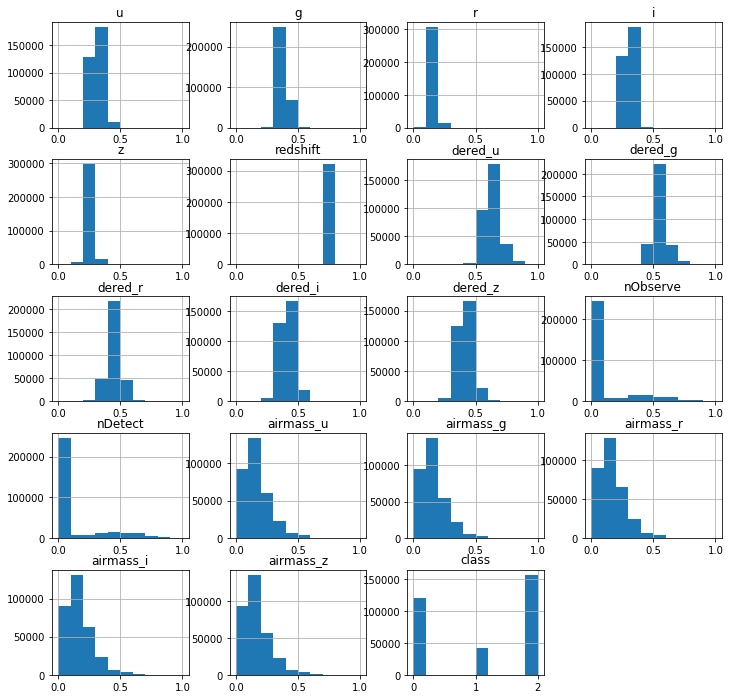

In [70]:
eda.hist(figsize = (12, 12))

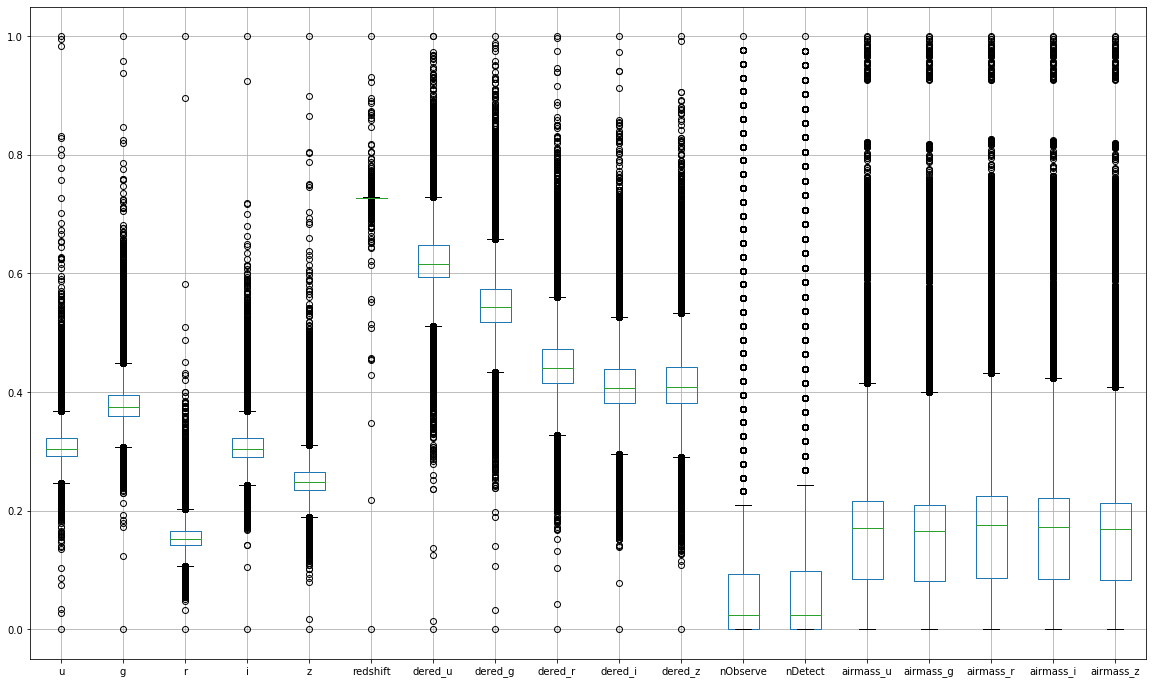

In [71]:
eda.drop("class", axis = "columns").boxplot(figsize = (20, 12))

0.0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1.0    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2.0             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

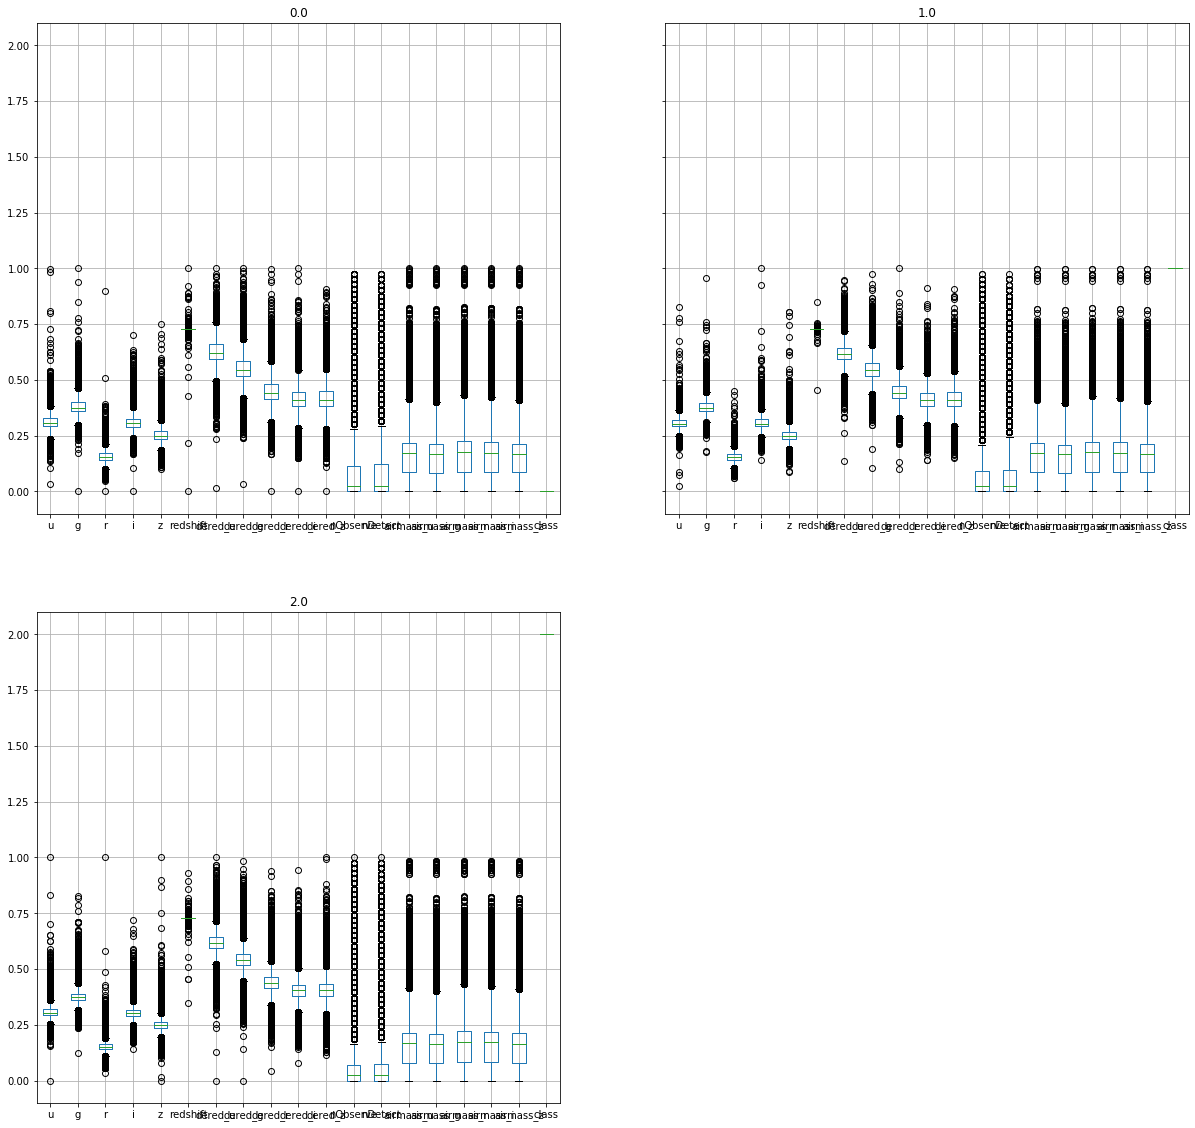

In [75]:
eda.groupby("class").boxplot(figsize = (20, 20))

class
0.0    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
1.0    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
2.0    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

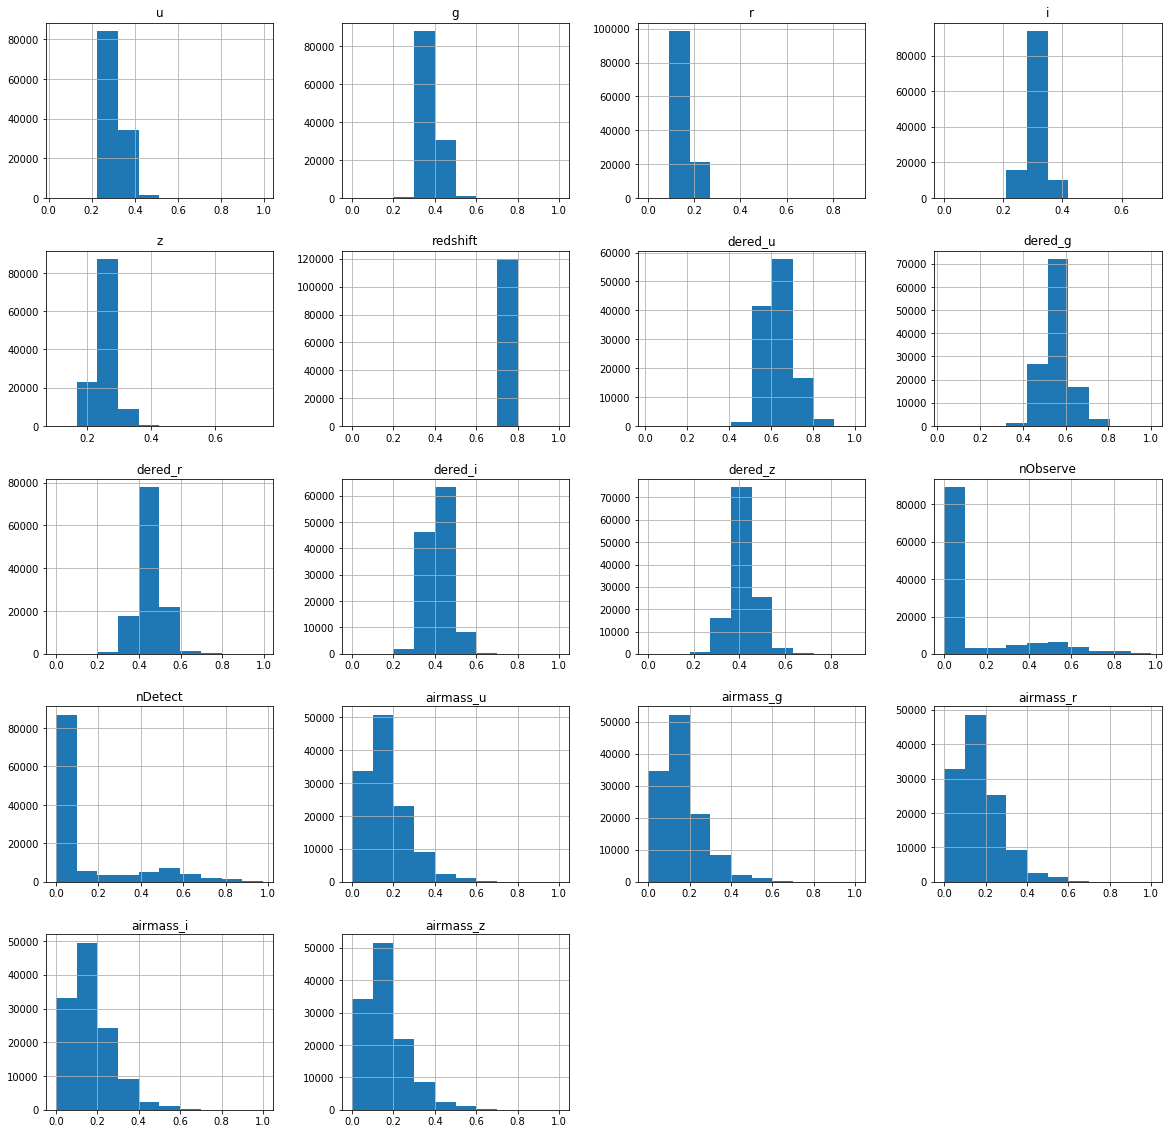

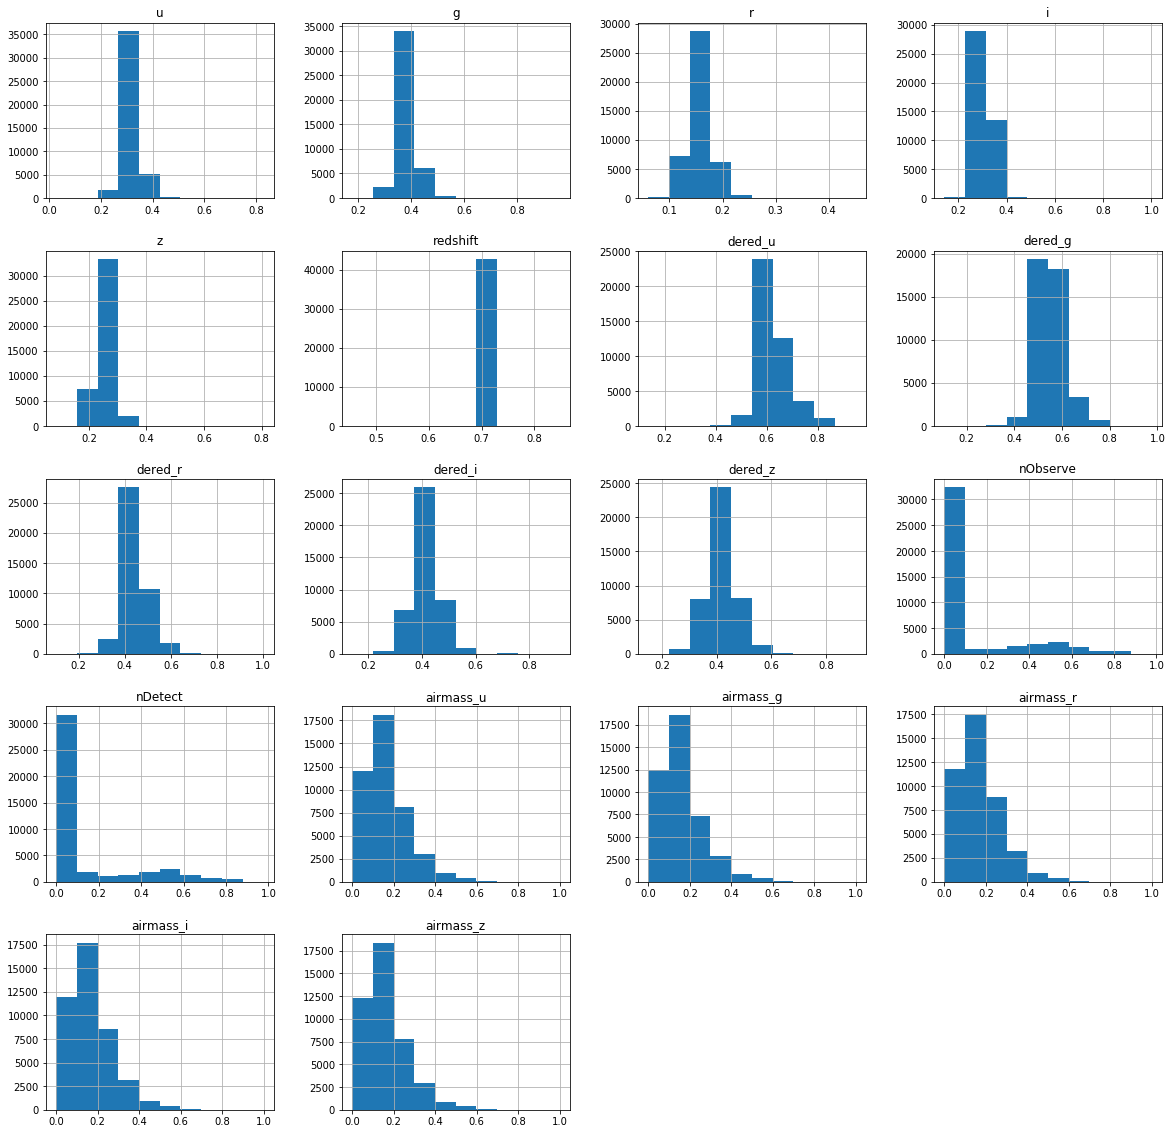

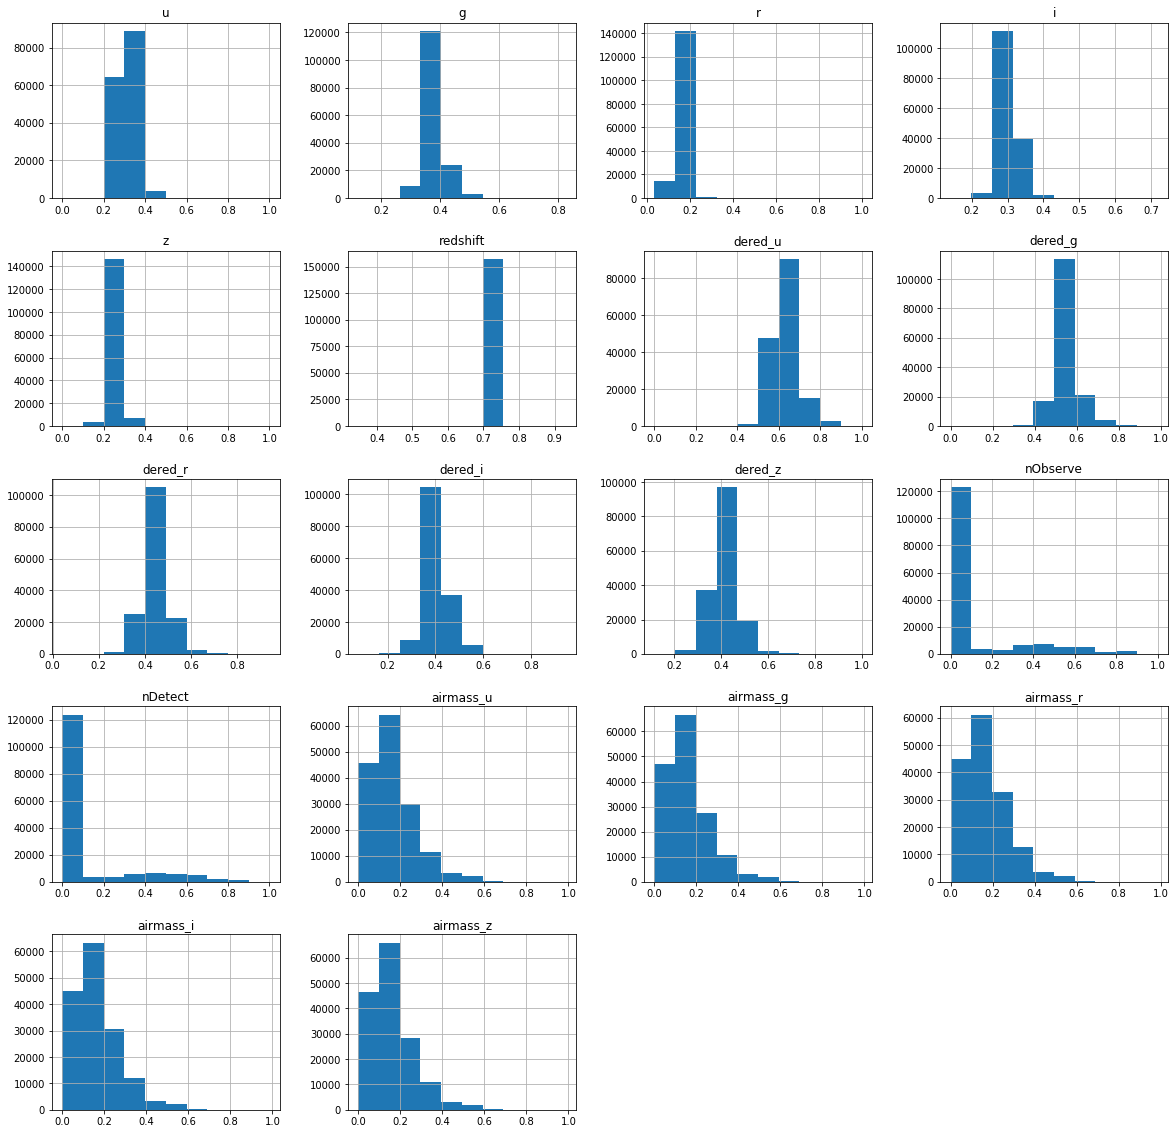

In [77]:
eda.groupby("class").hist(figsize = (20, 20))